In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df = pd.read_csv('C:\ML - DataSet/chennai_house_price_prediction.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7061 non-null   float64
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

In [84]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [85]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [86]:
df.corr()['SALES_PRICE']

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330999
N_BATHROOM       0.108884
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020556
COMMIS           0.626275
SALES_PRICE      1.000000
Name: SALES_PRICE, dtype: float64

## Visualization of dataset

In [87]:
def numerical(feature):
    sns.scatterplot(x = df[feature], y = df.SALES_PRICE, hue = df.REG_FEE, palette = 'Spectral')
def categorical(feature):
    plt.figure(figsize = (15,5))
    sns.barplot(x = df[feature], y = df.SALES_PRICE)

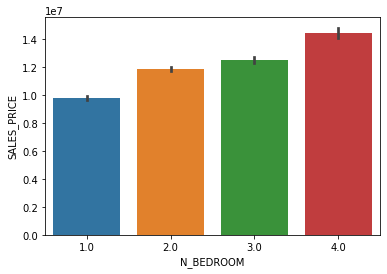

In [88]:
sns.barplot(x = df.N_BEDROOM, y = df.SALES_PRICE)

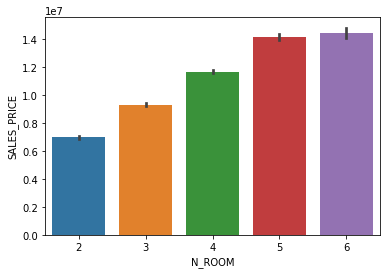

In [89]:
sns.barplot(x = df.N_ROOM, y = df.SALES_PRICE)

In [90]:
li = df.corr()['SALES_PRICE'].index
for i in df.columns:
    if i not in li:
        print(i)

PRT_ID
AREA
SALE_COND
PARK_FACIL
BUILDTYPE
UTILITY_AVAIL
STREET
MZZONE


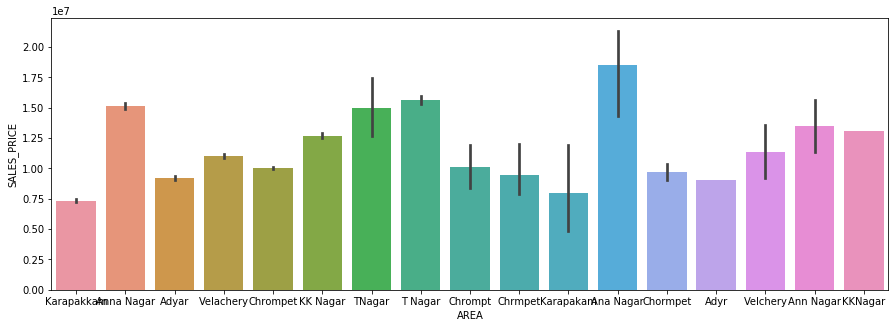

In [91]:
categorical('AREA')

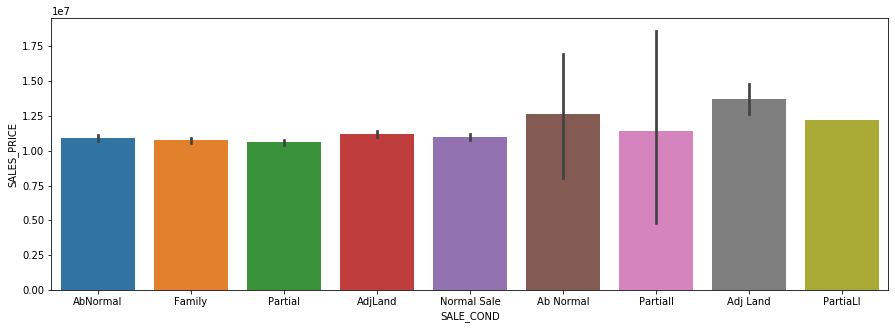

In [92]:
categorical('SALE_COND')

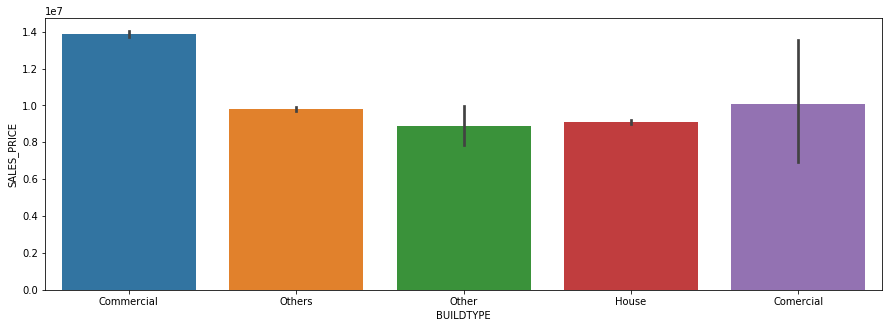

In [93]:
categorical('BUILDTYPE')

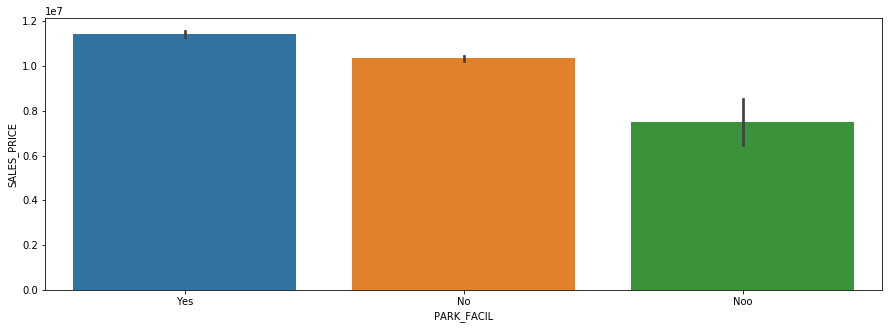

In [94]:
categorical('PARK_FACIL')

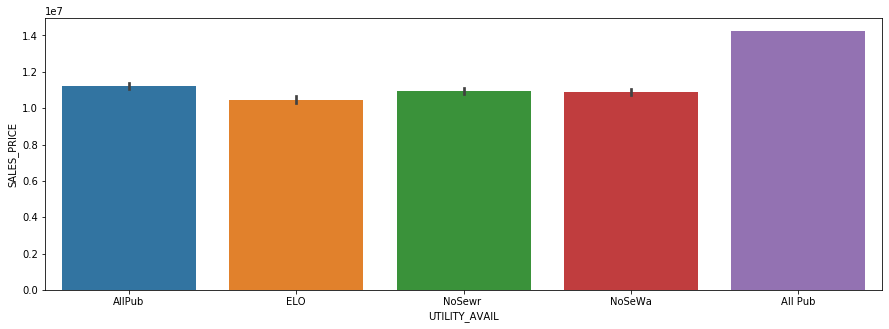

In [95]:
categorical('UTILITY_AVAIL')

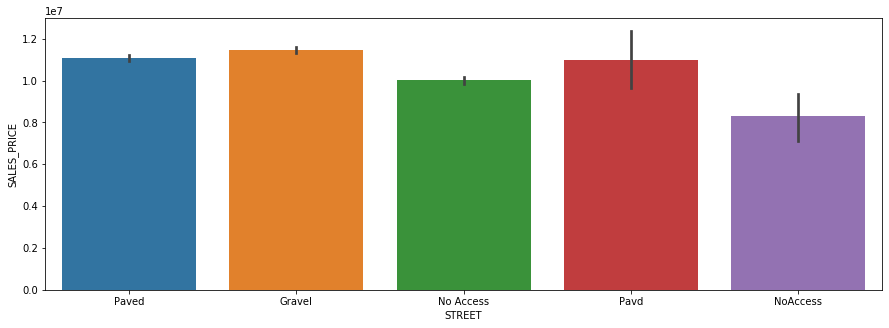

In [96]:
categorical('STREET')

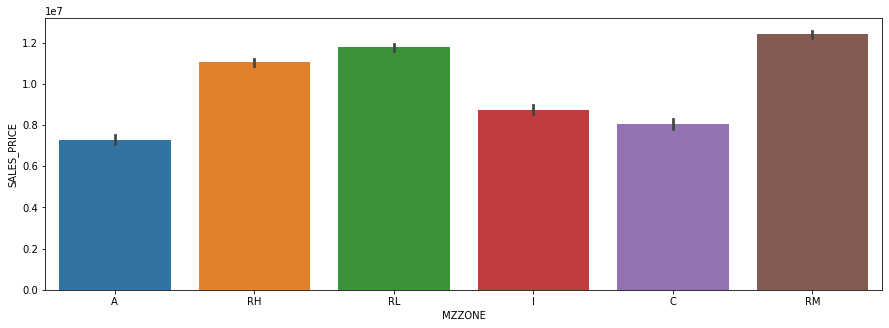

In [97]:
categorical('MZZONE')

In [98]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [99]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
COMMIS           0.626275
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330999
N_BATHROOM       0.108884
QS_ROOMS         0.021967
QS_OVERALL       0.020556
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
QS_BATHROOM     -0.011377
Name: SALES_PRICE, dtype: float64

## Multi-variate Analysis

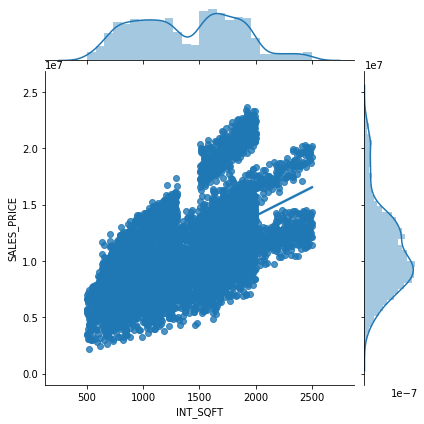

In [100]:
sns.jointplot(df.INT_SQFT,df.SALES_PRICE,kind='reg')

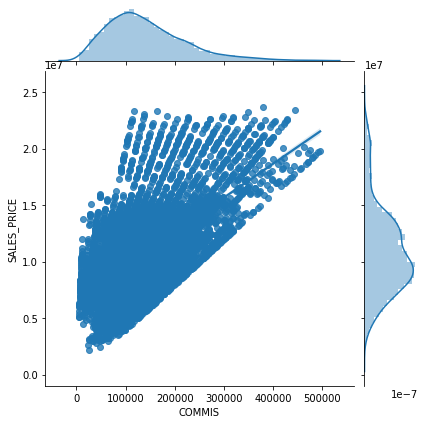

In [101]:
sns.jointplot(df.COMMIS,df.SALES_PRICE,kind='reg')

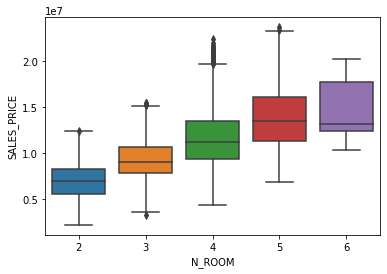

In [102]:
sns.boxplot(df.N_ROOM,df.SALES_PRICE)

In [103]:
df[df.N_ROOM<6].corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
COMMIS           0.613763
INT_SQFT         0.606349
N_ROOM           0.598389
N_BEDROOM        0.284661
N_BATHROOM       0.046137
QS_ROOMS         0.021851
QS_OVERALL       0.019446
DIST_MAINROAD    0.018330
QS_BEDROOM       0.018327
QS_BATHROOM     -0.012820
Name: SALES_PRICE, dtype: float64

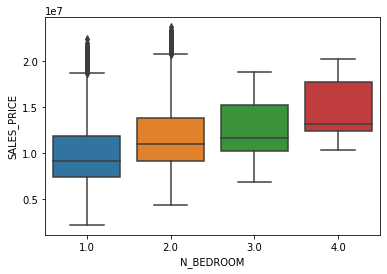

In [104]:
sns.boxplot(df.N_BEDROOM,df.SALES_PRICE)

## Imputation and Wrangling

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7061 non-null   float64
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

In [106]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [107]:
area = {'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar',
        'Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar'}
df.AREA = df.AREA.replace(area)

In [108]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [109]:
cond = {'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'}
df.SALE_COND = df.SALE_COND.replace(cond)
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [110]:
park = {'Noo':'No'}
df.PARK_FACIL = df.PARK_FACIL.replace(park)
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [111]:
df.BUILDTYPE = df.BUILDTYPE.replace({'Comercial':'Commercial','Other':'Others'})

In [112]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [113]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({'All Pub':'AllPub'})

In [114]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [115]:
df.STREET = df.STREET.replace({'NoAccess':'No Access','Pavd':'Paved'})
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [116]:
df.QS_OVERALL = (df.QS_BATHROOM + df.QS_BEDROOM + df.QS_ROOMS)/3
df[df.QS_OVERALL.isna()]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE


In [117]:
df[df.N_BEDROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,181,NaN,1.0,4,Partial,No,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.166667,107978,10797790


In [118]:
df[(df.AREA=='Anna Nagar') & (df.N_ROOM==4) & (df.N_BATHROOM==1)]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
34,P05950,Anna Nagar,1709,130,1.0,1.0,4,Family,No,Others,NoSeWa,Gravel,RH,4.8,3.2,4.3,4.100000,90500,12928590
47,P06006,Anna Nagar,1710,15,1.0,1.0,4,Normal Sale,Yes,Commercial,AllPub,Gravel,RH,2.7,4.0,2.2,2.966667,161728,20215970
65,P01247,Anna Nagar,1600,154,1.0,1.0,4,Family,Yes,House,ELO,Gravel,RH,3.9,2.7,2.5,3.033333,166891,11920820
75,P03590,Anna Nagar,1792,41,1.0,1.0,4,Family,Yes,House,ELO,Gravel,RM,2.7,2.6,2.0,2.433333,250313,13906270
101,P08848,Anna Nagar,1622,147,1.0,1.0,4,Family,Yes,House,ELO,Gravel,RL,4.4,3.7,4.2,4.100000,209015,13063450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,P00748,Anna Nagar,1598,121,1.0,1.0,4,AdjLand,Yes,House,ELO,Paved,RM,2.5,4.6,2.3,3.133333,203463,12716450
7052,P02116,Anna Nagar,1508,63,1.0,1.0,4,AbNormal,No,Others,NoSewr,No Access,RH,2.0,3.4,4.3,3.233333,165811,10363160
7070,P01473,Anna Nagar,1514,72,1.0,1.0,4,AdjLand,No,House,NoSewr,No Access,RM,4.5,4.4,5.0,4.633333,91070,11383690
7078,P00469,Anna Nagar,1622,109,1.0,1.0,4,AbNormal,Yes,Others,AllPub,No Access,RL,3.4,4.4,2.9,3.566667,118567,13174060


In [119]:
df.N_BEDROOM.fillna(1.0,inplace=True)
df[df.N_BATHROOM.isna()]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.033333,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.133333,106479,10647920
6134,P01332,Chrompet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,3.300000,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.000000,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.900000,124455,15556920


In [120]:
df[(df.AREA=='Chrompet')&(df.N_BEDROOM==1)&(df.N_ROOM==3)].N_BATHROOM.value_counts()

1.0    1142
Name: N_BATHROOM, dtype: int64

In [121]:
df.N_BATHROOM.fillna(1.0,inplace=True)

In [122]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.266667,144400,...,0,0,0,0,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.866667,304049,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.366667,92114,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.066667,77042,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.200000,74063,...,0,0,0,0,0,1,0,0,0,0


In [123]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE         1.000000
COMMIS              0.626275
INT_SQFT            0.612125
N_ROOM              0.602760
AREA_Anna Nagar     0.400390
                      ...   
MZZONE_I           -0.161581
BUILDTYPE_Others   -0.201783
MZZONE_C           -0.218441
BUILDTYPE_House    -0.344982
AREA_Karapakkam    -0.460068
Name: SALES_PRICE, Length: 7142, dtype: float64

## Modelling

In [126]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [128]:
X = df.drop('SALES_PRICE',axis=1)
y = df.SALES_PRICE

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,random_state=0,test_size=0.2)

In [130]:
kf = KFold(n_splits=10,shuffle=True)
lr = LinearRegression().fit(X_train,y_train)
cs = cross_val_score(lr,X_train,y_train,cv=kf)

In [131]:
cs.mean()

0.9555221475090026

In [132]:
lr.score(X_train,y_train), lr.score(X_valid,y_valid)

(1.0, 0.9552440090925091)

In [133]:
rr = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)
rr.score(X_train,y_train), rr.score(X_valid,y_valid)

(0.9953054625481429, 0.9704163484009618)

In [134]:
xx = XGBRegressor().fit(X_train,y_train)
xx.score(X_train,y_train), xx.score(X_valid,y_valid)

(0.9964032465735804, 0.987999498881907)